Dataset loaded successfully.

--- First 5 Rows of the Dataset ---
   No  year  month  day  hour  PM2.5  PM10   SO2   NO2     CO    O3  TEMP  \
0   1  2013      3    1     0    4.0   4.0   4.0   7.0  300.0  77.0  -0.7   
1   2  2013      3    1     1    8.0   8.0   4.0   7.0  300.0  77.0  -1.1   
2   3  2013      3    1     2    7.0   7.0   5.0  10.0  300.0  73.0  -1.1   
3   4  2013      3    1     3    6.0   6.0  11.0  11.0  300.0  72.0  -1.4   
4   5  2013      3    1     4    3.0   3.0  12.0  12.0  300.0  72.0  -2.0   

     PRES  DEWP  RAIN   wd  WSPM       station  
0  1023.0 -18.8   0.0  NNW   4.4  Aotizhongxin  
1  1023.2 -18.2   0.0    N   4.7  Aotizhongxin  
2  1023.5 -18.2   0.0  NNW   5.6  Aotizhongxin  
3  1024.5 -19.4   0.0   NW   3.1  Aotizhongxin  
4  1025.2 -19.5   0.0    N   2.0  Aotizhongxin  


--- Dataset Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 35064 entries, 0 to 35063
Data columns (total 18 columns):
 #   Column   Non-Null Count  Dtype  
---  --

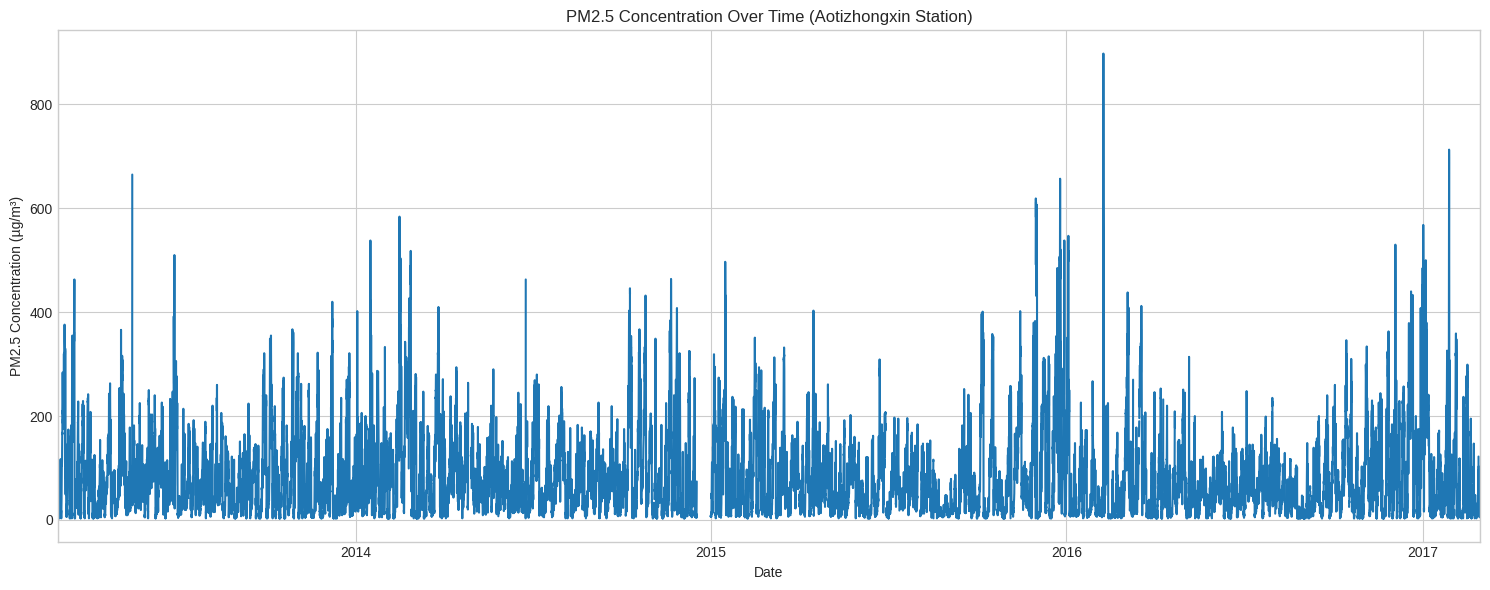

Displayed PM2.5 over time plot.

Plotting distributions for: PM2.5, TEMP, WSPM, PRES


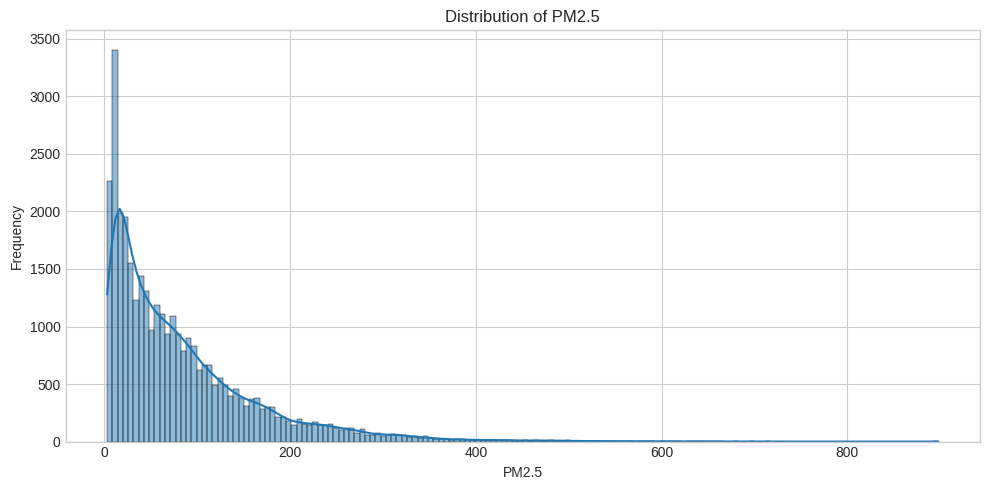

Displayed distribution plot for PM2.5.


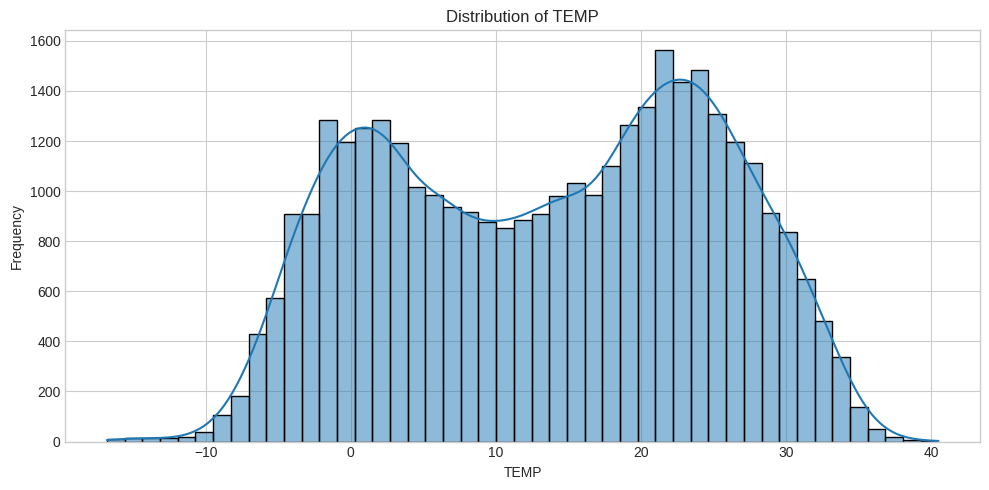

Displayed distribution plot for TEMP.


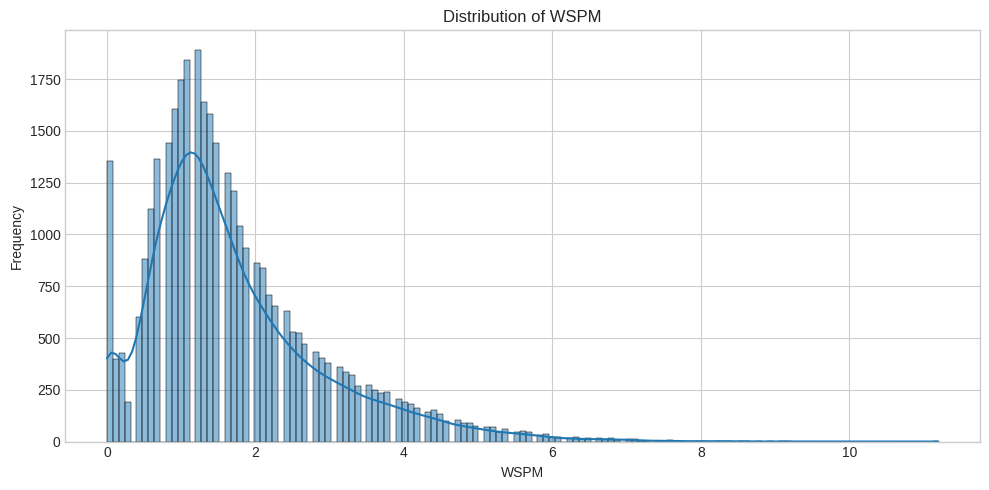

Displayed distribution plot for WSPM.


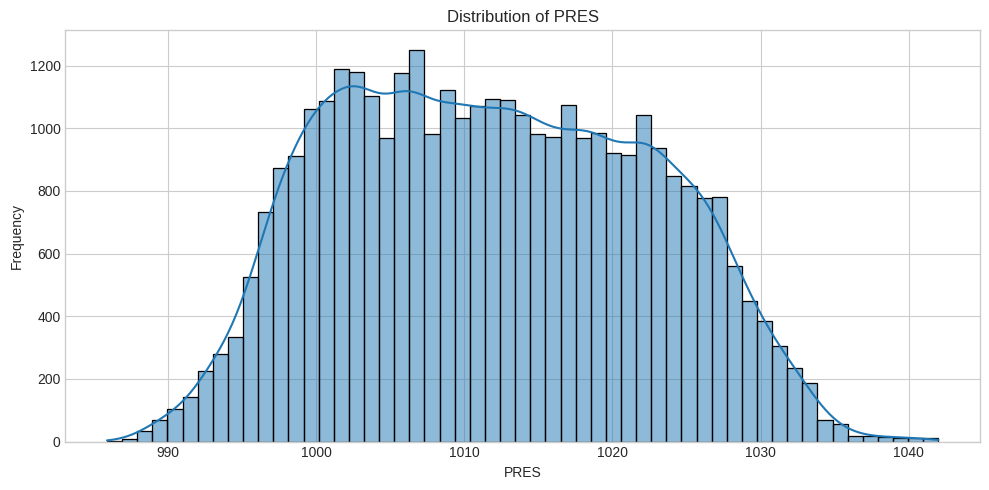

Displayed distribution plot for PRES.


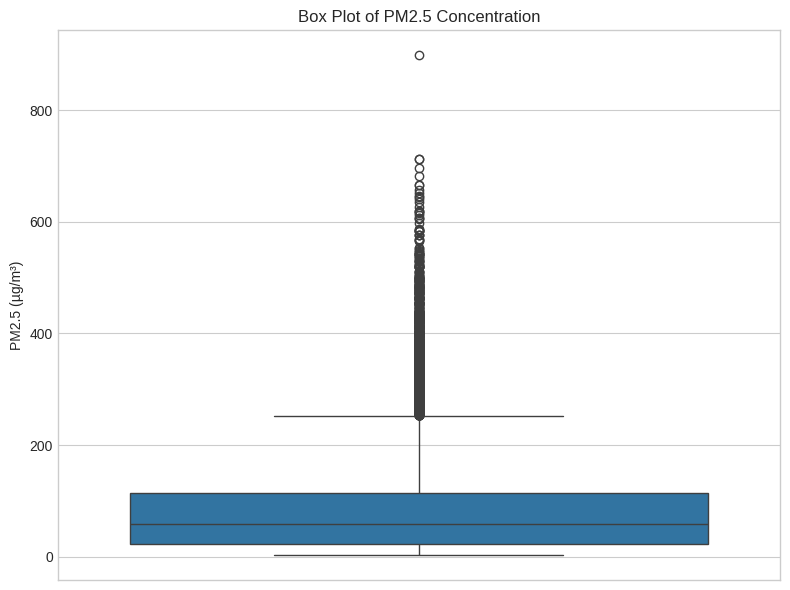

Displayed box plot for PM2.5.


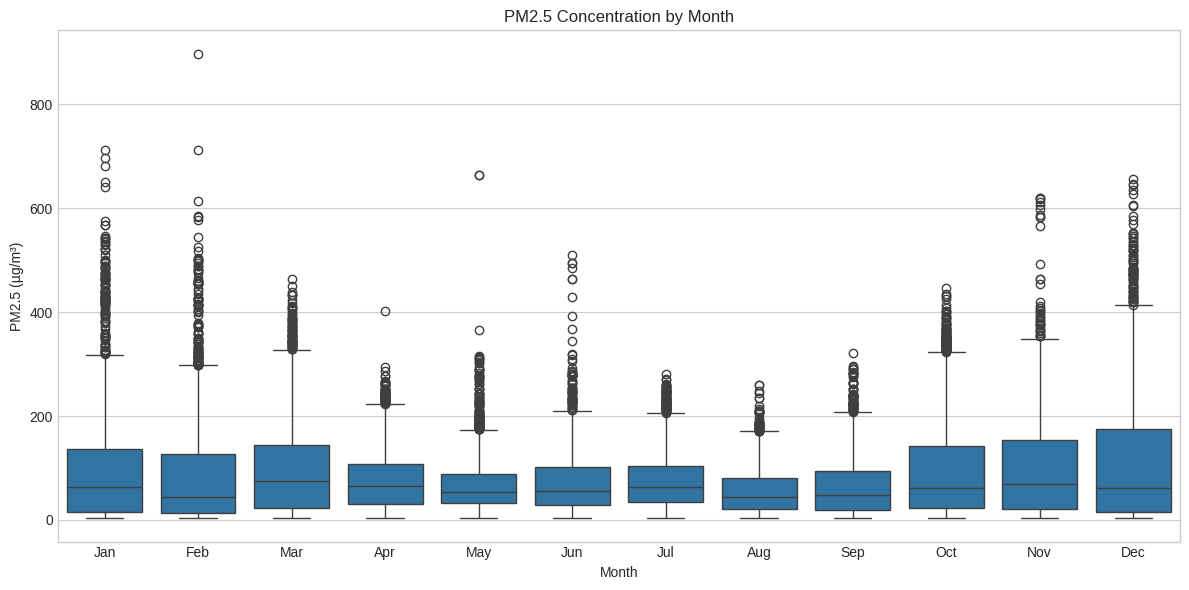

Displayed box plot of PM2.5 by month.


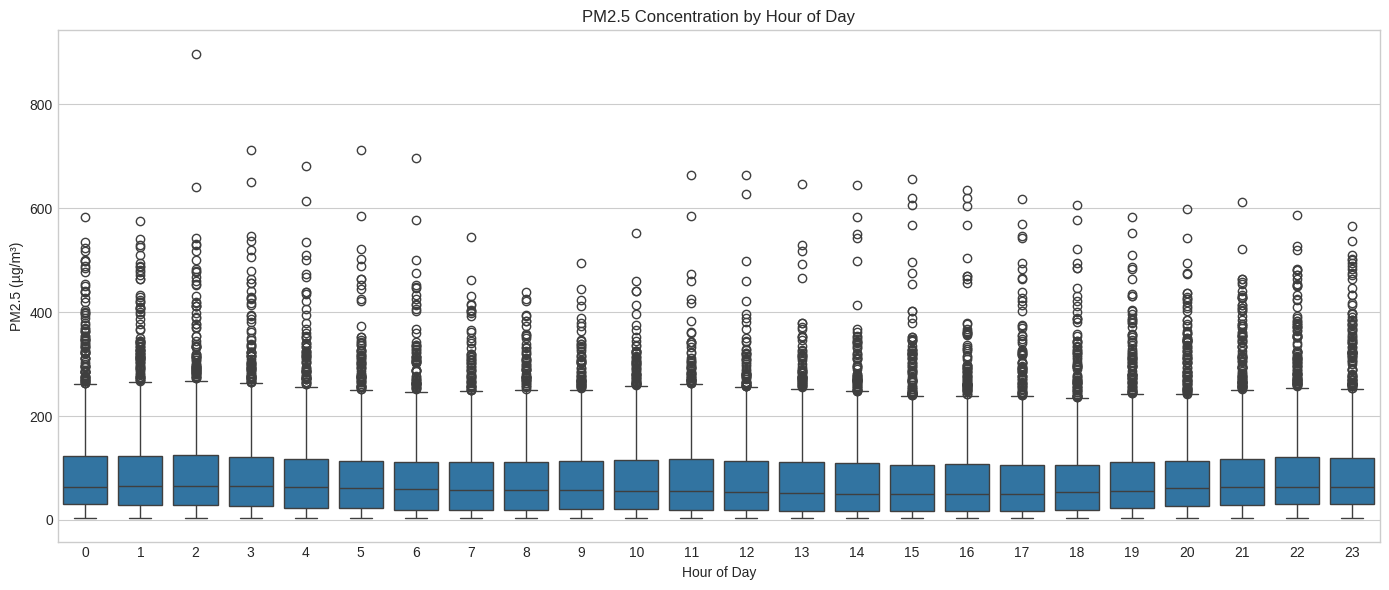

Displayed box plot of PM2.5 by hour.


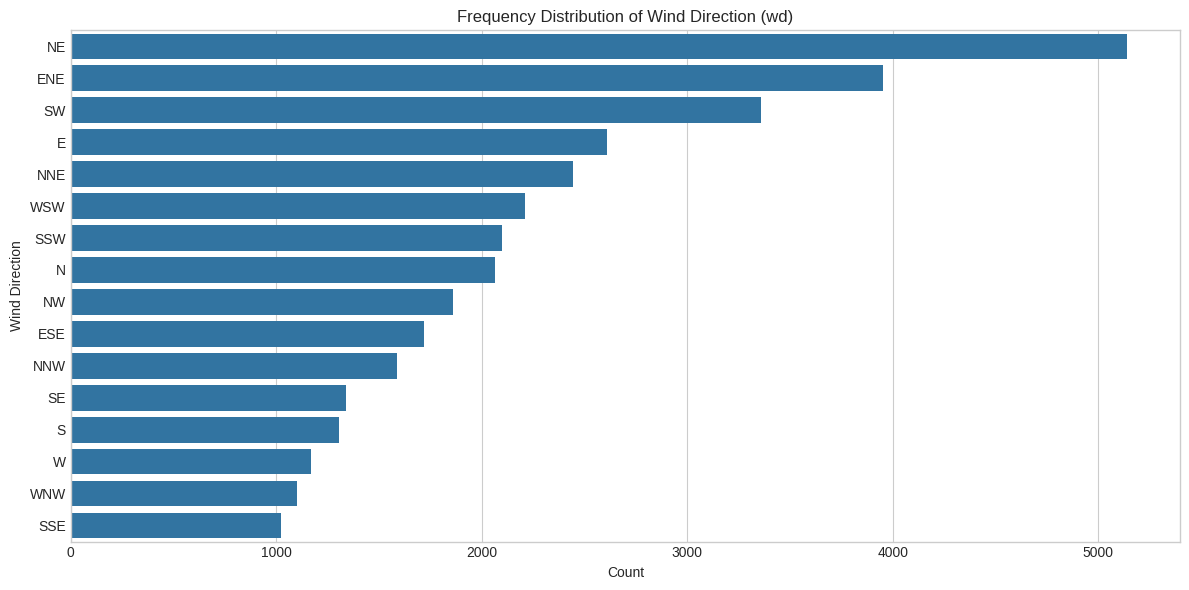

Displayed bar chart for wind direction.

--- EDA Script Finished ---


In [ ]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Loading and Initial Inspection ---

file_path = '/content/PRSA_Data_Aotizhongxin_20130301-20170228.csv'

try:
    # Load the dataset
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.\n")

    # Display the first few rows
    print("--- First 5 Rows of the Dataset ---")
    print(df.head())
    print("\n")

    # Examine column data types and non-null counts
    print("--- Dataset Info ---")
    df.info()
    print("\n")

    # Generate a summary of missing values per column
    print("--- Missing Values per Column ---")
    print(df.isnull().sum())
    print("\n")

    # --- 2. Datetime Feature Creation ---
    print("--- Creating Datetime Feature ---")
    # Combine year, month, day, hour into a single datetime column
    # Errors='coerce' will turn unparseable dates into NaT (Not a Time)
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']], errors='coerce')

    # Set the new 'datetime' column as the DataFrame's index
    df.set_index('datetime', inplace=True)

    columns_to_drop = ['year', 'month', 'day', 'hour', 'No', 'station']
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore') # errors='ignore' in case they were already dropped

    print("Datetime feature created and set as index.")
    print("Cleaned DataFrame head:")
    print(df.head())
    print("\n")


    # --- 3. Summary Statistics ---
    print("--- Summary Statistics for Numerical Columns ---")
    # Calculate descriptive statistics for all numerical columns
    # We'll select numeric types explicitly to avoid issues with non-numeric columns if any remain.
    numerical_cols = df.select_dtypes(include=['number']).columns
    print(df[numerical_cols].describe())
    print("\n")

    # --- 4. Data Visualizations ---
    print("--- Generating Data Visualizations ---")
    plt.style.use('seaborn-v0_8-whitegrid') # Using a seaborn style for better aesthetics

    # Target Variable (PM2.5) Over Time
    plt.figure(figsize=(15, 6))
    df['PM2.5'].plot(title='PM2.5 Concentration Over Time (Aotizhongxin Station)')
    plt.xlabel('Date')
    plt.ylabel('PM2.5 Concentration (µg/m³)')
    plt.tight_layout()
    plt.show()
    print("Displayed PM2.5 over time plot.")

    # Distribution of Key Numerical Features
    key_numerical_features = ['PM2.5', 'TEMP', 'WSPM', 'PRES']
    print(f"\nPlotting distributions for: {', '.join(key_numerical_features)}")

    for feature in key_numerical_features:
        if feature in df.columns:
            plt.figure(figsize=(10, 5))
            sns.histplot(df[feature].dropna(), kde=True) # dropna() to handle missing values for plotting
            plt.title(f'Distribution of {feature}')
            plt.xlabel(feature)
            plt.ylabel('Frequency')
            plt.tight_layout()
            plt.show()
            print(f"Displayed distribution plot for {feature}.")
        else:
            print(f"Warning: Column '{feature}' not found for distribution plot.")


    # Box Plots for Outlier Detection and Grouped Analysis

    # Box plot for PM2.5
    if 'PM2.5' in df.columns:
        plt.figure(figsize=(8, 6))
        sns.boxplot(y=df['PM2.5'].dropna())
        plt.title('Box Plot of PM2.5 Concentration')
        plt.ylabel('PM2.5 (µg/m³)')
        plt.tight_layout()
        plt.show()
        print("Displayed box plot for PM2.5.")

        # Box plots of PM2.5 grouped by month
        # Create a temporary month column from the datetime index for grouping
        df_temp = df.copy() # Work on a copy to avoid modifying original df
        df_temp['plot_month'] = df_temp.index.month
        plt.figure(figsize=(12, 6))
        sns.boxplot(x='plot_month', y='PM2.5', data=df_temp.dropna(subset=['PM2.5']))
        plt.title('PM2.5 Concentration by Month')
        plt.xlabel('Month')
        plt.ylabel('PM2.5 (µg/m³)')
        plt.xticks(ticks=range(12), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
        plt.tight_layout()
        plt.show()
        print("Displayed box plot of PM2.5 by month.")

        # Box plots of PM2.5 grouped by hour
        df_temp['plot_hour'] = df_temp.index.hour
        plt.figure(figsize=(14, 6))
        sns.boxplot(x='plot_hour', y='PM2.5', data=df_temp.dropna(subset=['PM2.5']))
        plt.title('PM2.5 Concentration by Hour of Day')
        plt.xlabel('Hour of Day')
        plt.ylabel('PM2.5 (µg/m³)')
        plt.tight_layout()
        plt.show()
        print("Displayed box plot of PM2.5 by hour.")
    else:
        print("Warning: Column 'PM2.5' not found for box plots.")


    # Categorical Feature Analysis (Wind Direction `wd`)
    if 'wd' in df.columns:
        plt.figure(figsize=(12, 6))
        sns.countplot(y=df['wd'].dropna(), order = df['wd'].dropna().value_counts().index) # Order by frequency
        plt.title('Frequency Distribution of Wind Direction (wd)')
        plt.xlabel('Count')
        plt.ylabel('Wind Direction')
        plt.tight_layout()
        plt.show()
        print("Displayed bar chart for wind direction.")
    else:
        print("Warning: Column 'wd' not found for wind direction plot.")

    print("\n--- EDA Script Finished ---")

except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the file path is correct and the CSV file is in the specified location.")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Please check your data and script.")

SyntaxError: invalid character '…' (U+2026) (<ipython-input-2-ea0012e725ac>, line 11)

Dataset loaded successfully.

--- Initial DataFrame Head ---
                     PM2.5  PM10   SO2   NO2     CO    O3  TEMP    PRES  DEWP  \
datetime                                                                        
2013-03-01 00:00:00    4.0   4.0   4.0   7.0  300.0  77.0  -0.7  1023.0 -18.8   
2013-03-01 01:00:00    8.0   8.0   4.0   7.0  300.0  77.0  -1.1  1023.2 -18.2   
2013-03-01 02:00:00    7.0   7.0   5.0  10.0  300.0  73.0  -1.1  1023.5 -18.2   
2013-03-01 03:00:00    6.0   6.0  11.0  11.0  300.0  72.0  -1.4  1024.5 -19.4   
2013-03-01 04:00:00    3.0   3.0  12.0  12.0  300.0  72.0  -2.0  1025.2 -19.5   

                     RAIN   wd  WSPM  
datetime                              
2013-03-01 00:00:00   0.0  NNW   4.4  
2013-03-01 01:00:00   0.0    N   4.7  
2013-03-01 02:00:00   0.0  NNW   5.6  
2013-03-01 03:00:00   0.0   NW   3.1  
2013-03-01 04:00:00   0.0    N   2.0  

--- Initial Missing Values ---
PM2.5     925
PM10      718
SO2       935
NO2      1023
CO       1

<ipython-input-3-6f4d0707630c>:51: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df['wd'] = df['wd'].fillna(method='ffill').fillna(method='bfill')


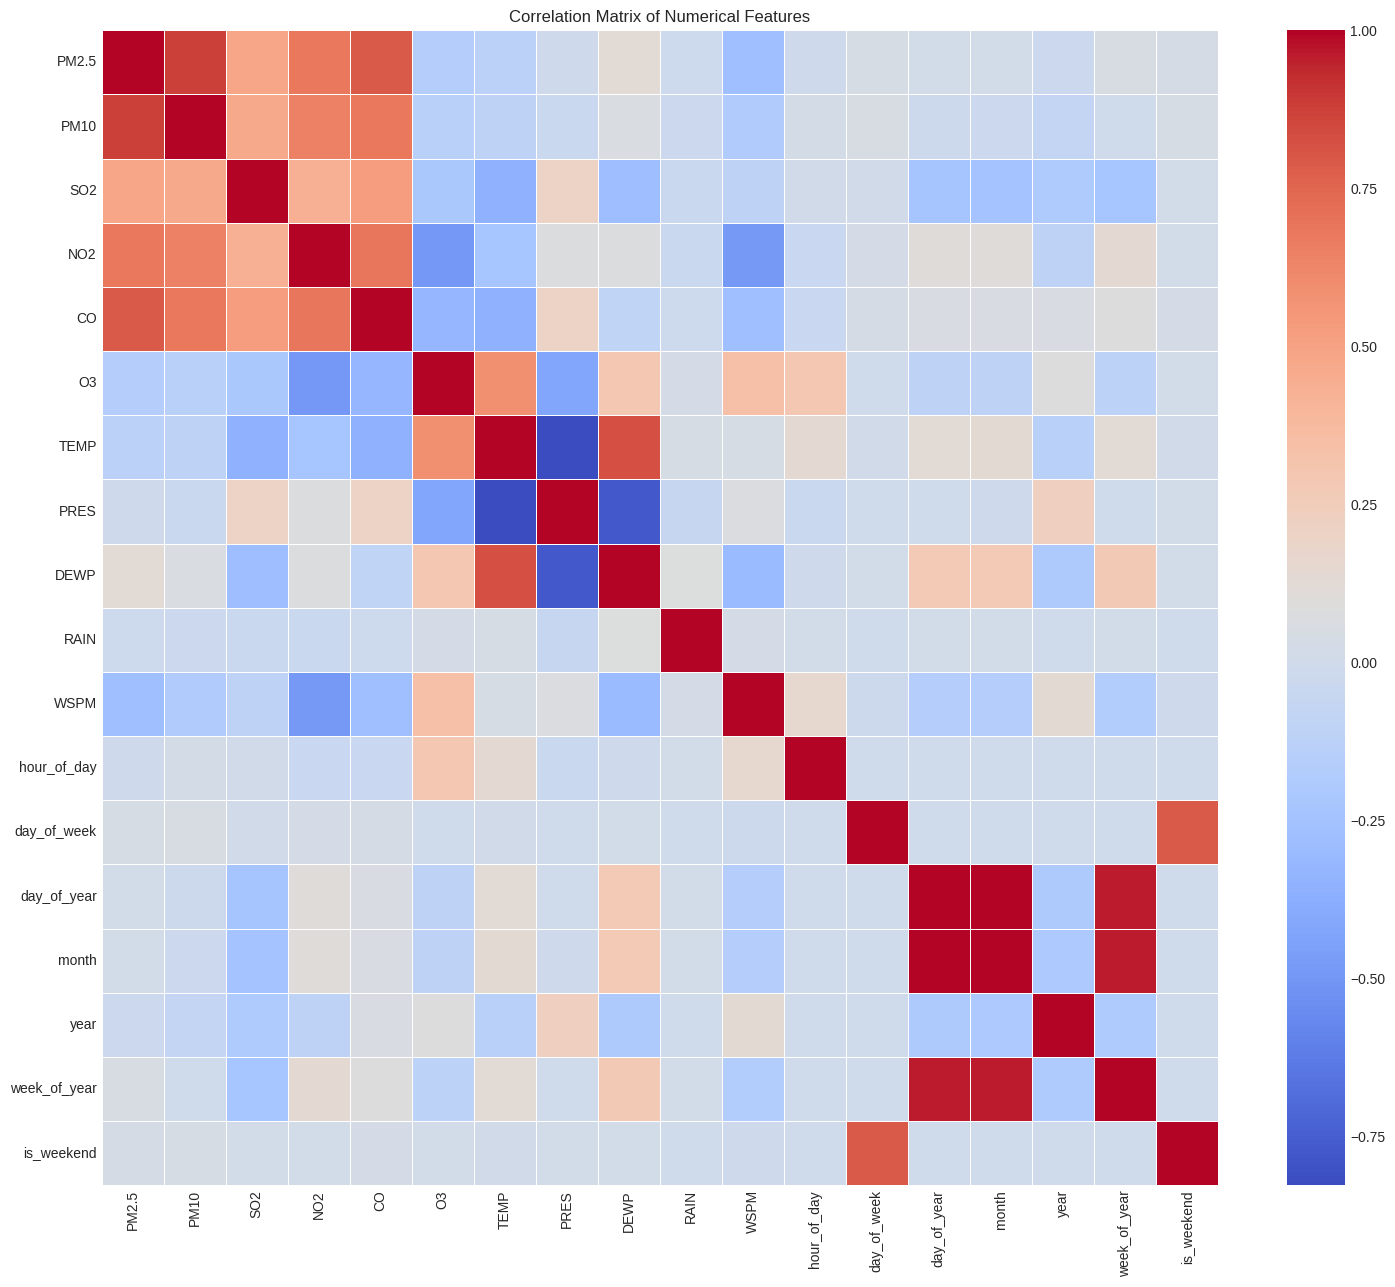

Displayed correlation matrix heatmap.

--- Top Correlations with PM2.5 ---
PM2.5           1.000000
PM10            0.875198
CO              0.786052
NO2             0.682795
SO2             0.479025
DEWP            0.123277
week_of_year    0.047493
day_of_week     0.043574
is_weekend      0.034480
day_of_year     0.014831
month           0.014398
PRES           -0.008796
hour_of_day    -0.010470
RAIN           -0.013780
year           -0.029873
TEMP           -0.122505
O3             -0.160271
WSPM           -0.275836
Name: PM2.5, dtype: float64


--- 5. Normalizing/Standardizing Features ---
Numerical features to be standardized: ['PM10', 'SO2', 'NO2', 'CO', 'O3', 'TEMP', 'PRES', 'DEWP', 'RAIN', 'WSPM', 'hour_of_day', 'day_of_week', 'day_of_year', 'month', 'year', 'week_of_year']
Numerical features standardized.
                         PM10       SO2       NO2        CO        O3  \
datetime                                                                
2013-03-01 00:00:00 -1.11493

In [ ]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

# --- Initial Data Loading and Preparation (from Task 1) ---
# IMPORTANT: Replace 'YOUR_FILE_PATH/PRSA_Data_Aotizhongxin_20130301-20170228.csv'
# with the actual path to your downloaded CSV file.
file_path = 'PRSA_Data_Aotizhongxin_20130301-20170228.csv' # Or the full path

try:
    # Load the dataset
    df = pd.read_csv(file_path)
    print("Dataset loaded successfully.\n")

    # Combine year, month, day, hour into a single datetime column
    df['datetime'] = pd.to_datetime(df[['year', 'month', 'day', 'hour']], errors='coerce')
    df.set_index('datetime', inplace=True)
    columns_to_drop = ['year', 'month', 'day', 'hour', 'No', 'station']
    df.drop(columns=columns_to_drop, inplace=True, errors='ignore')

    print("--- Initial DataFrame Head ---")
    print(df.head())
    print("\n--- Initial Missing Values ---")
    print(df.isnull().sum())
    print("\n")

    # --- Task 2: Data Preprocessing and Feature Engineering ---

    # 1. Handle Missing Values
    print("--- 1. Handling Missing Values ---")
    # For pollutant and meteorological numerical features, linear interpolation is a common choice for time series.
    # For PM2.5 (target), interpolation is also reasonable.
    numerical_cols_with_na = df.select_dtypes(include=np.number).isnull().sum()
    numerical_cols_to_interpolate = numerical_cols_with_na[numerical_cols_with_na > 0].index.tolist()

    if numerical_cols_to_interpolate:
        print(f"Interpolating numerical columns: {numerical_cols_to_interpolate}")
        for col in numerical_cols_to_interpolate:
            df[col] = df[col].interpolate(method='linear', limit_direction='both') # limit_direction fills NaNs at ends too
    else:
        print("No numerical columns found needing interpolation.")

    # For categorical 'wd' (wind direction), use forward fill then backward fill
    if 'wd' in df.columns and df['wd'].isnull().any():
        print("Filling missing 'wd' using ffill and bfill.")
        df['wd'] = df['wd'].fillna(method='ffill').fillna(method='bfill')
    elif 'wd' not in df.columns:
        print("Warning: 'wd' column not found.")
    else:
        print("'wd' column has no missing values.")


    print("\n--- Missing Values After Handling ---")
    print(df.isnull().sum())

    print("\n")


    # 2. Create Time-Based Features
    print("--- 2. Creating Time-Based Features ---")
    df['hour_of_day'] = df.index.hour
    df['day_of_week'] = df.index.dayofweek  # Monday=0, Sunday=6
    df['day_of_year'] = df.index.dayofyear
    df['month'] = df.index.month
    df['year'] = df.index.year # Useful for trends or splitting
    df['week_of_year'] = df.index.isocalendar().week.astype(int)
    df['is_weekend'] = df['day_of_week'].isin([5, 6]).astype(int)

    # Season (approximation)
    def get_season(date):
        month = date.month
        if month in [12, 1, 2]:
            return 'Winter'
        elif month in [3, 4, 5]:
            return 'Spring'
        elif month in [6, 7, 8]:
            return 'Summer'
        else: # 9, 10, 11
            return 'Autumn'
    df['season'] = df.index.to_series().apply(get_season)

    print("Time-based features created:")
    print(df[['hour_of_day', 'day_of_week', 'month', 'season', 'is_weekend']].head())
    print("\n")

    # 3. Handle Categorical Features ('wd' and 'season')
    print("--- 3. Handling Categorical Features (One-Hot Encoding) ---")
    # 'wd' (wind direction) and 'season' are categorical
    categorical_features = ['wd', 'season']
    # Create a copy for one-hot encoding to keep original df cleaner for now
    df_processed = df.copy()

    # Check if categorical features exist before trying to encode
    existing_categorical_features = [col for col in categorical_features if col in df_processed.columns]

    if existing_categorical_features:
        print(f"Applying One-Hot Encoding to: {existing_categorical_features}")
        df_processed = pd.get_dummies(df_processed, columns=existing_categorical_features, prefix=existing_categorical_features, dummy_na=False) # dummy_na=False as we handled NaNs
        print("Categorical features one-hot encoded.")
        print("DataFrame columns after one-hot encoding (sample):")
        print(df_processed.filter(regex='wd_|season_').head())
    else:
        print("No specified categorical features found for one-hot encoding.")
    print("\n")


    # 4. Analyse Correlations
    print("--- 4. Analyzing Correlations ---")

    numerical_cols_for_corr = df_processed.select_dtypes(include=np.number).columns

    # It's often useful to see correlations with the target variable specifically
    if 'PM2.5' in numerical_cols_for_corr:
        correlation_matrix = df_processed[numerical_cols_for_corr].corr()
        plt.figure(figsize=(18, 15)) # Adjusted size for more features
        sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f", linewidths=.5) # Annot=False if too cluttered
        plt.title('Correlation Matrix of Numerical Features')
        plt.show()
        print("Displayed correlation matrix heatmap.")

        print("\n--- Top Correlations with PM2.5 ---")
        pm25_correlations = correlation_matrix['PM2.5'].sort_values(ascending=False)
        print(pm25_correlations)
    else:
        print("PM2.5 column not found or not numerical for correlation analysis.")
    print("\n")


    # 5. Normalize or Standardize Features
    print("--- 5. Normalizing/Standardizing Features ---")


    # Re-identify numerical columns from df_processed
    numerical_features_to_scale = df_processed.select_dtypes(include=np.number).columns.tolist()

    # Exclude target variable and binary/already scaled features if necessary
    if 'PM2.5' in numerical_features_to_scale:
        numerical_features_to_scale.remove('PM2.5') # Target usually not scaled with features

    # Exclude one-hot encoded columns (they are already 0 or 1)
    # and other binary features like 'is_weekend'
    one_hot_cols = [col for col in df_processed.columns if col.startswith(tuple(f"{cat}_" for cat in existing_categorical_features))]
    binary_features = ['is_weekend'] + one_hot_cols

    numerical_features_to_scale = [col for col in numerical_features_to_scale if col not in binary_features]

    if numerical_features_to_scale:
        print(f"Numerical features to be standardized: {numerical_features_to_scale}")
        scaler = StandardScaler()
        # Fit and transform
        df_processed[numerical_features_to_scale] = scaler.fit_transform(df_processed[numerical_features_to_scale])
        print("Numerical features standardized.")
        print(df_processed[numerical_features_to_scale].head())
    else:
        print("No numerical features identified for scaling or all are binary/target.")
    print("\n")


    # 6. Outlier Handling (Demonstration for PM2.5)
    print("--- 6. Outlier Handling Demonstration (for PM2.5) ---")
    if 'PM2.5' in df.columns: # Use original df for this demonstration before scaling
        Q1 = df['PM2.5'].quantile(0.25)
        Q3 = df['PM2.5'].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR

        print(f"PM2.5 - Q1: {Q1}, Q3: {Q3}, IQR: {IQR}")
        print(f"PM2.5 - Lower Bound for outliers: {lower_bound}")
        print(f"PM2.5 - Upper Bound for outliers: {upper_bound}")

        outliers = df[(df['PM2.5'] < lower_bound) | (df['PM2.5'] > upper_bound)]
        print(f"Number of potential outliers in PM2.5: {len(outliers)}")

    else:
        print("PM2.5 column not found for outlier analysis.")
    print("\n")


    print("--- Final Processed DataFrame Head (df_processed) ---")
    print(df_processed.head())
    print("\n--- Final Processed DataFrame Info ---")
    df_processed.info()

    print("\n--- Task 2 Script Finished ---")


except FileNotFoundError:
    print(f"Error: The file '{file_path}' was not found.")
    print("Please ensure the file path is correct and the CSV file is in the specified location.")
except Exception as e:
    print(f"An error occurred: {e}")
    print("Please check your data and script carefully.")